In [4]:
# Install Java, Spark, and Findspark
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-ba

In [5]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [7]:
df1 = pd.read_csv("Fake.csv")
df2 = pd.read_csv("True.csv")

In [8]:
df1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
df1['class'] = "fake"
df2['class'] = "true"

In [11]:
combine_df = pd.concat([df1,df2])
combine_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [12]:
# from glob import glob
# pop_files = sorted(glob("data/*.csv"))
# pop_files

In [ ]:
# combine_df = pd.concat((pd.read_csv(file).assign(label=file) 
#                        for file in pop_files),ignore_index=True)
# combine_df = combine_df.replace("data/Fake.csv","fake")
# combine_df = combine_df.replace("data/True.csv","true")
# combine_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


#  Remove punctuation

In [ ]:
# string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# def remove_punct(text):
#     text_nopunct = "".join([char for char in text if char not in string.punctuation])
#     return text_nopunct

# combine_df["clean_text"] = combine_df["text"].apply(lambda x:remove_punct(x))

# combine_df.head()

,title,text,subject,date,Label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,On Friday it was revealed that former Milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,On Christmas day Donald Trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,Pope Francis used his annual Christmas Day mes...


# Tokenization

In [13]:
def tokeniz(text):
    token = re.split('\W+', text)
    return token
clean_df = combine_df
clean_df["token_text"] = clean_df["text"].apply(lambda x:tokeniz(x.lower()))

clean_df.head()

,title,text,subject,date,class,token_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,"[donald, trump, just, couldn, t, wish, all, am..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,"[on, friday, it, was, revealed, that, former, ..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,"[on, christmas, day, donald, trump, announced,..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,"[pope, francis, used, his, annual, christmas, ..."


# Remove stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
stopword = nltk.corpus.stopwords.words('english')

In [16]:
def remove_stopword(token):
    text = [word for word in token if word not in stopword]
    return text

clean_df["nostopword_text"] = clean_df["token_text"].apply(lambda x:remove_stopword(x))

clean_df.head()

,title,text,subject,date,class,token_text,nostopword_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ..."


# Lemmatizing

In [17]:
from nltk.stem import WordNetLemmatizer

In [18]:
wl = WordNetLemmatizer()

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [21]:
def lemmatizing(stopword):
    text = [wl.lemmatize(word) for word in stopword]
    return text

clean_df["lemmatizing_text"] = clean_df["nostopword_text"].apply(lambda x:lemmatizing(x))

clean_df.head()

,title,text,subject,date,class,token_text,nostopword_text,lemmatizing_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, wish, american, happy, new, ye..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ...","[pope, francis, used, annual, christmas, day, ..."


In [23]:
clean_df.to_csv("clean_data.csv")

# N-Grams

In [24]:
# from collections import Counter

In [25]:
fake_df = clean_df[(clean_df["class"] == "fake")]
# fake = fake_df["text"]
true_df = clean_df[(clean_df["class"] == "true")]
# true = true_df["text"]

In [ ]:
# bigrams_true = (true, true[1:])
# bigram_counts_true = Counter(bigrams_true)
# bigrams_true = pd.DataFrame(bigram_counts_true.most_common(20), columns=["Bigram", "Count"])
# bigrams_true

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [27]:
most_common_uni = get_top_text_ngrams(fake_df.text,10,1)

In [28]:
most_common_uni

[('the', 543551),
 ('to', 290819),
 ('of', 236640),
 ('and', 226971),
 ('in', 171163),
 ('that', 151662),
 ('is', 111234),
 ('for', 93480),
 ('on', 83591),
 ('it', 83380)]

In [29]:
most_common_bi = get_top_text_ngrams(fake_df.text,10,2)

In [30]:
most_common_bi

[('of the', 54010),
 ('in the', 39907),
 ('to the', 27755),
 ('on the', 18979),
 ('to be', 16538),
 ('donald trump', 16275),
 ('for the', 16071),
 ('that the', 15307),
 ('and the', 14223),
 ('at the', 12925)]

In [31]:
def convert(l): 
    return tuple(i[0] for i in l) 

In [32]:
t = convert(combine_df.lemmatizing_text)

In [33]:
t

('donald',
 'house',
 'friday',
 'christmas',
 'pope',
 'number',
 'donald',
 'wake',
 'many',
 'might',
 'centerpiece',
 'republican',
 'republican',
 'medium',
 'abigail',
 'donald',
 'new',
 'trump',
 'right',
 'senate',
 'almost',
 'metoo',
 'democrat',
 'alabama',
 'backlash',
 'donald',
 'ronald',
 '',
 'donald',
 'sen',
 'america',
 'new',
 'wednesday',
 'president',
 'campaign',
 'arizona',
 'whole',
 'heard',
 'senator',
 'donald',
 'donald',
 'everyone',
 'donald',
 'donald',
 'donald',
 'donald',
 'michael',
 'donald',
 'michigan',
 'people',
 'jared',
 'donald',
 'awful',
 'case',
 'u',
 'sure',
 'donald',
 'donald',
 'great',
 'former',
 'pathetic',
 'breitbart',
 'would',
 'donald',
 'sunday',
 'last',
 'former',
 'one',
 'fox',
 'donald',
 'ivanka',
 'senator',
 'republican',
 'seems',
 'year',
 'gene',
 'donald',
 'pastor',
 'add',
 'yesterday',
 'republican',
 'conservative',
 '',
 'election',
 'donald',
 'maybe',
 'alabama',
 'roy',
 'president',
 'thursday',
 'republ

In [ ]:
# list(combine_df.lemmatizing_text[0])[0]

In [ ]:
get_top_text_ngrams(t,10,2)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [34]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords= nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [35]:
true_word = basic_clean(''.join(str(true_df['text'].tolist())))

In [36]:
true_bigrams = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]

In [37]:
true_bigrams

(United, States)         12176
(White, House)            8269
(Donald, Trump)           7963
(WASHINGTON, Reuters)     6483
(President, Donald)       5913
(North, Korea)            5282
(Reuters, The)            3921
(said, statement)         3878
(New, York)               3567
(said, The)               3541
(official, said)          3520
(told, Reuters)           3491
(Trump, said)             3433
(Islamic, State)          3349
(told, reporter)          3184
(last, year)              3178
(US, President)           2956
(last, week)              2949
(Prime, Minister)         2906
(said, would)             2870
dtype: int64

In [38]:
true_trigrams = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]

In [39]:
true_trigrams

(President, Donald, Trump)          4415
(US, President, Donald)             2523
(President, Barack, Obama)          1959
(WASHINGTON, Reuters, US)           1668
(WASHINGTON, Reuters, The)          1556
(President, Donald, Trumps)         1427
(The, United, States)               1294
(The, White, House)                 1063
(Reuters, US, President)             996
(White, House, said)                 951
(President, Barack, Obamas)          906
(respond, request, comment)          799
(US, House, Representatives)         777
(Nov, 8, election)                   771
(Reuters, The, US)                   764
(President, Vladimir, Putin)         763
(NEW, YORK, Reuters)                 733
(Reuters, President, Donald)         672
(WASHINGTON, Reuters, President)     669
(Secretary, State, Rex)              652
dtype: int64

In [40]:
fake_word = basic_clean(''.join(str(fake_df['text'].tolist())))

In [41]:
fake_bigrams = (pd.Series(nltk.ngrams(fake_word, 2)).value_counts())[:20]

In [42]:
fake_trigrams = (pd.Series(nltk.ngrams(fake_word, 3)).value_counts())[:20]

In [43]:
fake_bigrams

(Donald, Trump)             13000
(Hillary, Clinton)           6660
(White, House)               6234
(United, States)             6151
(image, via)                 6072
(New, York)                  4167
(I, think)                   3841
(President, Obama)           3754
(President, Trump)           3451
(Fox, News)                  2530
(Barack, Obama)              2205
(Donald, J)                  2152
(21st, Century)              2148
(J, Trump)                   2117
(Century, Wire)              1922
(Trump, supporter)           1810
(Supreme, Court)             1746
(I, know)                    1701
(Trump, realDonaldTrump)     1672
(Trump, campaign)            1653
dtype: int64

In [44]:
fake_trigrams

(Donald, J, Trump)             2111
(21st, Century, Wire)          1898
(J, Trump, realDonaldTrump)    1670
(New, York, Times)             1464
(Black, Lives, Matter)         1123
(AT, 21st, Century)             983
(NEWS, AT, 21st)                921
(President, Barack, Obama)      819
(image, via, video)             782
(President, Donald, Trump)      765
(Century, Wire, say)            725
(video, screen, capture)        721
(A, MEMBER, 21WIRETV)           707
(via, video, screen)            666
(New, York, City)               602
(Featured, image, via)          600
(The, New, York)                565
(George, W, Bush)               564
(President, United, States)     548
(via, Getty, Images)            534
dtype: int64

# WordCloud

In [45]:
from wordcloud import WordCloud,STOPWORDS

In [46]:
def plot_wordcloud(text):
    wordcloud = WordCloud(background_color = 'black',
                         max_words = 2000,
                         width=1600,
                         height=800).generate("".join(text))
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

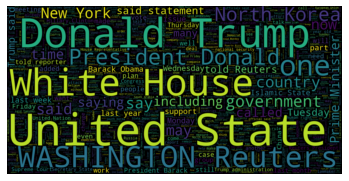

In [47]:
plot_wordcloud(true_df.text)

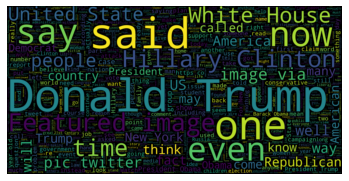

In [48]:
plot_wordcloud(fake_df.text)

One Hot Encoding

In [165]:
data = clean_df.values

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#,max_features=5000

In [167]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(clean_df["text"])
tfIdf

<44898x122002 sparse matrix of type '<class 'numpy.float64'>'
	with 9397629 stored elements in Compressed Sparse Row format>

In [168]:
X = tfIdf
y = data[:, 4]

In [49]:
clean_df

,title,text,subject,date,class,token_text,nostopword_text,lemmatizing_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, wish, american, happy, new, ye..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ...","[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true,"[brussels, reuters, nato, allies, on, tuesday,...","[brussels, reuters, nato, allies, tuesday, wel...","[brussels, reuters, nato, ally, tuesday, welco..."
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true,"[london, reuters, lexisnexis, a, provider, of,...","[london, reuters, lexisnexis, provider, legal,...","[london, reuters, lexisnexis, provider, legal,..."
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true,"[minsk, reuters, in, the, shadow, of, disused,...","[minsk, reuters, shadow, disused, soviet, era,...","[minsk, reuters, shadow, disused, soviet, era,..."
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true,"[moscow, reuters, vatican, secretary, of, stat...","[moscow, reuters, vatican, secretary, state, c...","[moscow, reuters, vatican, secretary, state, c..."


In [169]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [170]:
encoded_y, y

(array([0, 0, 0, ..., 1, 1, 1]),
 array(['fake', 'fake', 'fake', ..., 'true', 'true', 'true'], dtype=object))

In [171]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y)

In [173]:
from tensorflow.keras.utils import to_categorical

In [174]:
y_train

array([1, 0, 1, ..., 1, 0, 1])

In [175]:
X_train.shape

(33673, 122002)

In [176]:
X_train

<33673x122002 sparse matrix of type '<class 'numpy.float64'>'
	with 7051894 stored elements in Compressed Sparse Row format>

In [177]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [178]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [185]:
from tensorflow.keras.models import Sequential

model = Sequential()
from tensorflow.keras.layers import Dense
number_inputs = 122002
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

In [186]:
X_train.sort_indices()

In [187]:
X_test.sort_indices()

In [188]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 4)                 488012    
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 10        
Total params: 488,022
Trainable params: 488,022
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [190]:
model.fit(
    X_train,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
1053/1053 - 2s - loss: 0.2537 - accuracy: 0.9370
Epoch 2/10
1053/1053 - 2s - loss: 0.0513 - accuracy: 0.9894
Epoch 3/10
1053/1053 - 2s - loss: 0.0210 - accuracy: 0.9971
Epoch 4/10
1053/1053 - 2s - loss: 0.0099 - accuracy: 0.9989
Epoch 5/10
1053/1053 - 2s - loss: 0.0050 - accuracy: 0.9995
Epoch 6/10
1053/1053 - 2s - loss: 0.0027 - accuracy: 0.9998
Epoch 7/10
1053/1053 - 2s - loss: 0.0015 - accuracy: 0.9999
Epoch 8/10
1053/1053 - 2s - loss: 9.4166e-04 - accuracy: 0.9999
Epoch 9/10
1053/1053 - 2s - loss: 5.7904e-04 - accuracy: 0.9999
Epoch 10/10
1053/1053 - 2s - loss: 3.9631e-04 - accuracy: 0.9999


In [191]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

351/351 - 0s - loss: 0.0187 - accuracy: 0.9939
Loss: 0.01871364563703537, Accuracy: 0.9939420819282532


In [192]:
# use this to train our new dataset from scraping the web
# new_data = np.array([[0.2, 0.3, 0.4]])
# print(f"Predicted class: {model.predict_classes(new_data)}")